### 3.3 Classes em Python não pagam imposto sobre herança

### Objetivo: Modele algum conceito científico utilizando herança de classes.

### Considerações do experimento: O uso da herança de classes deve fazer sentido dentro do contexto científico escolhido, isto é, deve haver uma justificativa bem embasada para o uso de herança de classes na sua entrega. Certifique-se que a classe mãe tem pelo
menos um método que não seja dunder para ser herdado pela classe filha. Garanta que a
classe filha tem pelo menos um método (dunder ou não) que justifique a sua criação

### Abordagem Utilizada

​Para abordar este desafio, utilizei um conceito recorrente na ciência: grandezas. Uma grandeza é definida como tudo aquilo que pode ser medido, contado ou quantificado; para isso, é necessário que possua um valor e uma unidade de medida. Entretanto, nem todas as grandezas são iguais. Embora todas possuam valor e unidade, algumas, como as grandezas vetoriais, possuem características adicionais. Além do valor (módulo) e da unidade, essas grandezas também possuem direção e sentido. Por exemplo, a força e a velocidade são grandezas vetoriais que necessitam dessas informações adicionais para serem completamente definidas. ​

Dessa forma, optei por criar uma classe mãe que define uma grandeza geral e uma classe filha específica para representar vetores. As grandezas que possuem apenas módulo e unidade de medida são conhecidas como grandezas escalares. A classe mãe possui um método chamado ```comparar grandezas``` que sera herdada pela classe filha.

Criando a classe grandeza

In [60]:
class Grandeza:

    def __init__(self, nome, modulo, unidade):

        self.nome = nome
        self.modulo = modulo
        self.unidade = unidade

    def __repr__(self):
        return f"Valor da Grandeza {self.nome}: {self.modulo} {self.unidade}"
    
    def comparar_grandezas(self, outra):
        """Compara duas grandezas e retorna a maior."""
        if not isinstance(outra, Grandeza):
            raise TypeError("A comparação deve ser feita com outra Grandeza")
        
        if self.unidade != outra.unidade:
            raise ValueError("Grandezas devem estar na mesma unidade para comparação")

        return f"a grandeza {self.nome} é maior em magnitude que a grandeza {outra.nome}" if self.modulo > outra.modulo else  f"a grandeza {outra.nome} é maior me magnitude que a grandeza {self.nome}"



Instanciando Grandezas

In [83]:
velocidade_carro = Grandeza("velocidade carro", 90, "km/h")

velocidade_avião = Grandeza("velocidade avião", 800, "km/h")

temperatura_media = Grandeza("temperatura média em Nárnia", 273, "K")

massa_hidrogenio = Grandeza("massa do hidrogênio", 1.008, "u")

Visualizando grandezas

In [84]:
velocidade_carro

Valor da Grandeza velocidade carro: 90 km/h

In [85]:
velocidade_avião

Valor da Grandeza velocidade avião: 800 km/h

In [86]:
temperatura_media

Valor da Grandeza temperatura média em Nárnia: 273 K

In [87]:
massa_hidrogenio

Valor da Grandeza massa do hidrogênio: 1.008 u

Acima, apresentamos duas grandezas escalares e duas vetoriais. Em relação às grandezas escalares, dispomos de todas as informações necessárias, uma vez que possuem apenas módulo e unidade de medida. Entretanto, ao considerarmos a velocidade, surge um problema. Afirmar que um carro está a 90 km/h não é suficiente, pois essa grandeza também possui direção e sentido. Para representar isso, podemos criar uma classe filha que modele grandezas vetoriais. Além disso, para cumprir um dos objetivos da atividade, a classe filha terá um método que plotará uma visualização do vetor, fornecendo toda informação da grandeza. Além disso, poderemos utilizar o método ```comparar_grandezas``` herdada pela classe mãe.

In [88]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
class GrandezaVetorial(Grandeza): 

    def __init__(self, nome, modulo, unidade, direcao, sentido):

        super().__init__(nome, modulo, unidade)

        self.direcao = direcao
        self.sentido = sentido

    def __repr__(self):
        return f"Grandeza Vetorial {self.nome}: {self.sentido} {self.modulo} {self.unidade} com direção {self.direcao}°"
    
    def visualizar_vetor(self):
    
        radianos = np.radians(self.direcao)
        dx = self.modulo * np.cos(radianos)
        dy = self.modulo * np.sin(radianos)

        if self.sentido == "-" :
            dx = -dx
            dy = -dy


        plt.figure(figsize=(6, 6))
        plt.quiver(0, 0, dx, dy, angles='xy', scale_units='xy', scale=1, color='b', headwidth=3, headlength=5)
        plt.xlim(-self.modulo - 1, self.modulo + 1)
        plt.ylim(-self.modulo - 1, self.modulo + 1)
        plt.axhline(0, color='black',linewidth=0.5)
        plt.axvline(0, color='black',linewidth=0.5)
        plt.grid(True)
        plt.xlabel('Eixo X')
        plt.ylabel('Eixo Y')
        plt.title(f'Vetor com direção {self.direcao}° e módulo {self.modulo} {self.unidade}')
        plt.show()


Instanciando e visualisando grandezas vetoriais


In [90]:
velocidade_carro = GrandezaVetorial("velocidade de um carro", 90, "km/h", 30, "+")

velocidade_aviao = GrandezaVetorial("velocidade de um avião", 800, "km/h", 3, "-")

peso_pessoa = GrandezaVetorial("peso de uma pessoa", 650, "N", 270, "+")

forca = GrandezaVetorial("força qualquer", 540, "N", 20, "-")

campo_eletrico = GrandezaVetorial("campo elétrico de um Pikachu", 10, "N/C", 5, "+")

corrente_eletrica_chuveiro = GrandezaVetorial("corrente de um chuveiro de 7500W",34.0909, "A", 0, "+")


In [91]:
velocidade_carro

Grandeza Vetorial velocidade de um carro: + 90 km/h com direção 30°

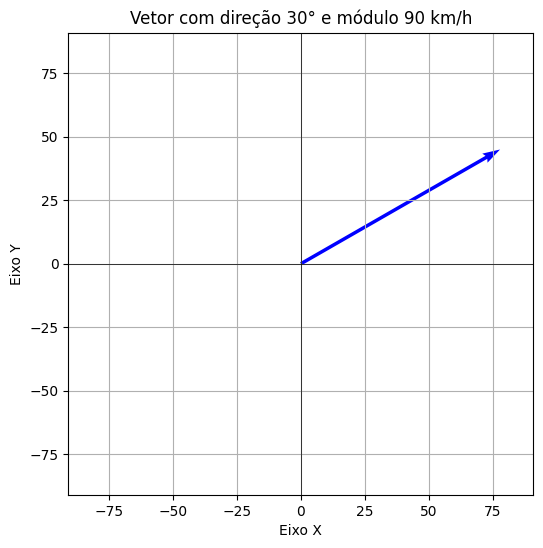

In [92]:
velocidade_carro.visualizar_vetor()

In [93]:
velocidade_aviao

Grandeza Vetorial velocidade de um avião: - 800 km/h com direção 3°

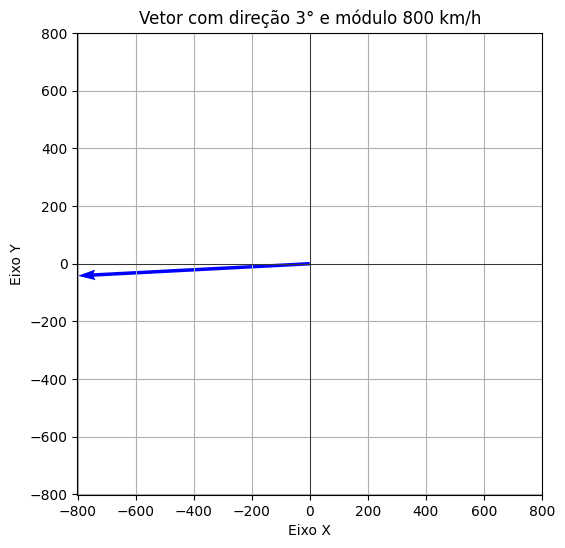

In [94]:
velocidade_aviao.visualizar_vetor()

In [95]:
peso_pessoa

Grandeza Vetorial peso de uma pessoa: + 650 N com direção 270°

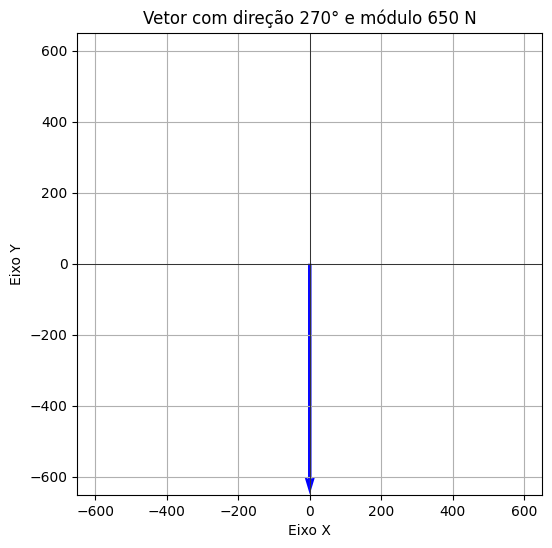

In [96]:
peso_pessoa.visualizar_vetor()

In [97]:
forca

Grandeza Vetorial força qualquer: - 540 N com direção 20°

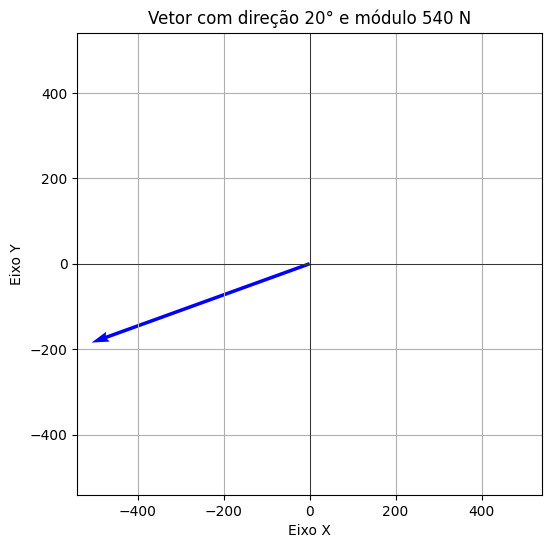

In [98]:
forca.visualizar_vetor()

In [99]:
campo_eletrico

Grandeza Vetorial campo elétrico de um Pikachu: + 10 N/C com direção 5°

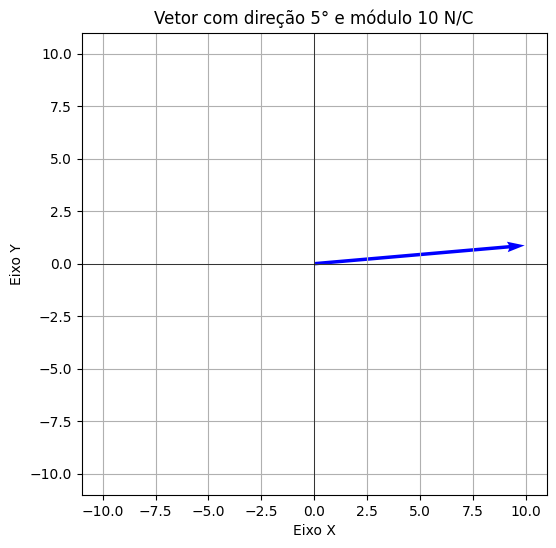

In [100]:
campo_eletrico.visualizar_vetor()

In [101]:
corrente_eletrica_chuveiro

Grandeza Vetorial corrente de um chuveiro de 7500W: + 34.0909 A com direção 0°

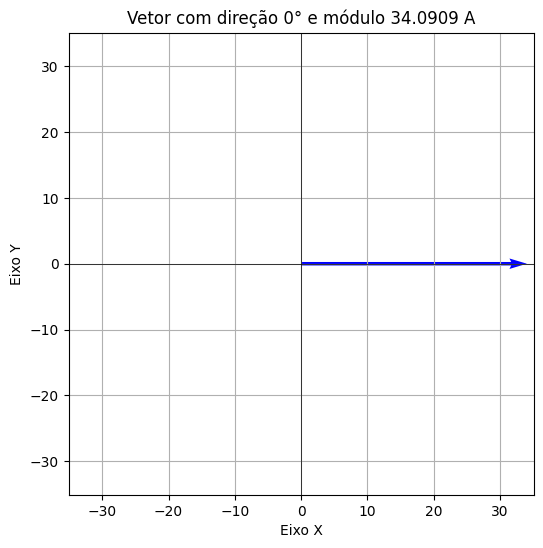

In [102]:
corrente_eletrica_chuveiro.visualizar_vetor()

Agora vamos utilizar o método herdado pela classe mãe para comparar a magnitude de grandezas que possuem a mesma unidade. Também vamos testar o que ocorre quando tentamos comparar grandezas que possuem unidades diferentes.


In [103]:
print(velocidade_aviao.comparar_grandezas(velocidade_carro))

a grandeza velocidade de um avião é maior em magnitude que velocidade de um carro


In [104]:
print(peso_pessoa.comparar_grandezas(forca))

a grandeza peso de uma pessoa é maior em magnitude que força qualquer


In [105]:
print(campo_eletrico.comparar_grandezas(corrente_eletrica_chuveiro))

ValueError: Grandezas devem estar na mesma unidade para comparação

Como pode-se ver acima, o método não permite comparar magnitudes que possuam unidades diferentes.


#### Conclusões

Aplicar o conceito de herança entre classes a um contexto científico foi um desafio, mas trouxe uma compreensão mais profunda sobre a estrutura e o funcionamento da programação orientada a objetos. A experiência permitiu perceber como a reutilização de código se torna mais eficiente, uma vez que a classe filha herda atributos e métodos da classe mãe, evitando redundâncias e favorecendo a organização do código.

#### Referências

CASSAR, Daniel Roberto. ATP-303 NN 2.2.1 - Um pouco mais sobre herança. Videoaula ministrada na ILUM - Escola de Ciência.  